In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.cm as cm

from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_samples, silhouette_score, homogeneity_score, completeness_score

from sklearn.cluster import KMeans

from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import NMF

In [ ]:
sns.set_style("whitegrid")
sns.set_context("notebook")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/final_project/data/fashion_mnist_sample.csv")

# Intro

  For a brief overview, the Fashion-MNIST dataset is one that consists of a training set with 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image that is associated with a label from 10 classes. Each image consists of a total of 784 pixels. Attached to each pixel is a value that indicates the lightness or darkness of that pixel. These values range from 0 to 255. 
  The testing and training examples are assigned with the following labels. 


*   0: T-shirt/top
*   1: Trouser
*   2: Pullover
*   3: Dress
*   4: Coat
*   5: Sandal
*   6: Shirt
*   7: Sneaker
*   8: Bag
*   9: Ankle Boot

The MNIST dataset is a large dataset of handwritten digits that are mainly used for training and benchmarking various machine learning models. This dataset was intended to be used for benchmarking various machine learning algorithms. Fashion-MNIST was created as a replacement for the MNIST dataset, containing images of various clothing items. This dataset is useful because it helps understand the techniques and the deep learning recogition pattern on real world data. This dataset is great at allowing the user to understand and learn these machine learning patterns. Given the flexitbility of this dataset, it is been researched to be a very fitting dataset for image classification. This dataset can be used for classic machine learning models such as KNN, Decision Trees, and extraction features such as PCA. The dataset already has a well-defined train and test dataset that we can use. In order to estimate the performance of a model for a given training run, we can further split the training set into a train and validation dataset. Performance on the train and validation dataset over each run can then be plotted to provide learning curves and insight into how well a model is learning the problem. 

Overall, this dataset provides the user with a variety of tests that can be implicated in order to reach the conclusion. In our case, we will be using this dataset to run unsupervised learning analysis. Essentially, our goal is to determine whether this data is clusterable or not. Through the use of different clustering methods we can reach a conclusion as to whether these results support the reason for conducting an unsupervised learning analysis. 

Sources:

Research, Z. (2017, December 07). Fashion mnist. Retrieved April 29, 2021, from https://www.kaggle.com/zalando-research/fashionmnist

Mahajan, P. (n.d.). Playing with fashion mnist. Retrieved April 29, 2021, from https://pravarmahajan.github.io/fashion/

-, S., By, -, Chatterjee, S., &amp; Here, P. (2020, October 28). Top 20 dataset in Machine Learning: Machine learning dataset. Retrieved April 29, 2021, from https://www.mygreatlearning.com/blog/top-20-dataset-in-machine-learning/



# EDA

In [ ]:
df.shape

(2000, 785)

* There are 2,000 examples and 785 columns (=attributes).

In [ ]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,Bag,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Trousers,0,0,0,0,0,0,0,0,0,15,230,211,213,219,222,222,214,210,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,107,255,...,244,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,109,127,0,19,131,124,0,0,0,0,0,0,0,0,0,0,0
2,Dress,0,0,0,0,0,0,0,0,0,0,0,154,175,31,0,0,66,164,67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,204,192,203,164,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,42,174,46,116,53,54,0,0,0,0,0,0,0,0,0,0
3,Pullover,0,0,0,0,0,0,0,0,0,36,43,71,95,122,108,78,68,61,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,27,131,88,...,111,106,107,154,56,111,135,148,44,0,0,0,0,0,0,0,0,0,0,19,113,101,107,105,108,112,111,109,108,108,109,136,35,0,14,15,0,0,0,0
4,Ankle boot,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


* The first column is label of each example. Therefore, there are actually 784 columns, pixels in this case.

Before we perform any analysis, we just want to make sure that the data is clean to use.

In [ ]:
df.drop(['label'], axis=1).isnull().sum().sum()

0

Since there isn't any null value, no cleaning is necessary.

Therefore, I will perform EDA on the DataFrame df.

In [ ]:
"""
Since this is a dataset of images,
it might be good to visualize examples.

We normalized all the attributes, pixel values,
for visualization purpose only.
"""

min_max_scalor = MinMaxScaler()  # instanciating MinMaxScaler
normalized_df = min_max_scalor.fit_transform(df.loc[:, 'pixel1':])  # normalizing pixel values
normalized_df = pd.DataFrame(normalized_df, columns=list(df.columns)[1:])  # appending column names
normalized_df = normalized_df.join(df.label)  # appending label column
normalized_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,Bag
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.063025,0.901961,0.827451,0.852,0.858824,0.874016,0.870588,0.839216,0.823529,0.035857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.419608,1.000000,0.937255,...,0.023529,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.427451,0.498039,0.000000,0.074510,0.513725,0.486275,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,Trousers
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.603922,0.700,0.121569,0.000000,0.000000,0.258824,0.643137,0.266932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.831373,...,0.752941,0.796078,0.643137,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.019608,0.164706,0.682353,0.180392,0.454902,0.207843,0.211765,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,Dress
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.151261,0.168627,0.278431,0.380,0.478431,0.425197,0.305882,0.266667,0.239216,0.179283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.105882,0.513725,0.345098,0.458824,...,0.415686,0.419608,0.603922,0.219608,0.435294,0.529412,0.580392,0.172549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078512,0.476793,0.437229,0.42126,0.411765,0.423529,0.439216,0.435294,0.427451,0.423529,0.423529,0.456067,0.544,0.137255,0.0,0.055777,0.058824,0.0,0.0,0.0,0.0,Pullover
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,Ankle boot


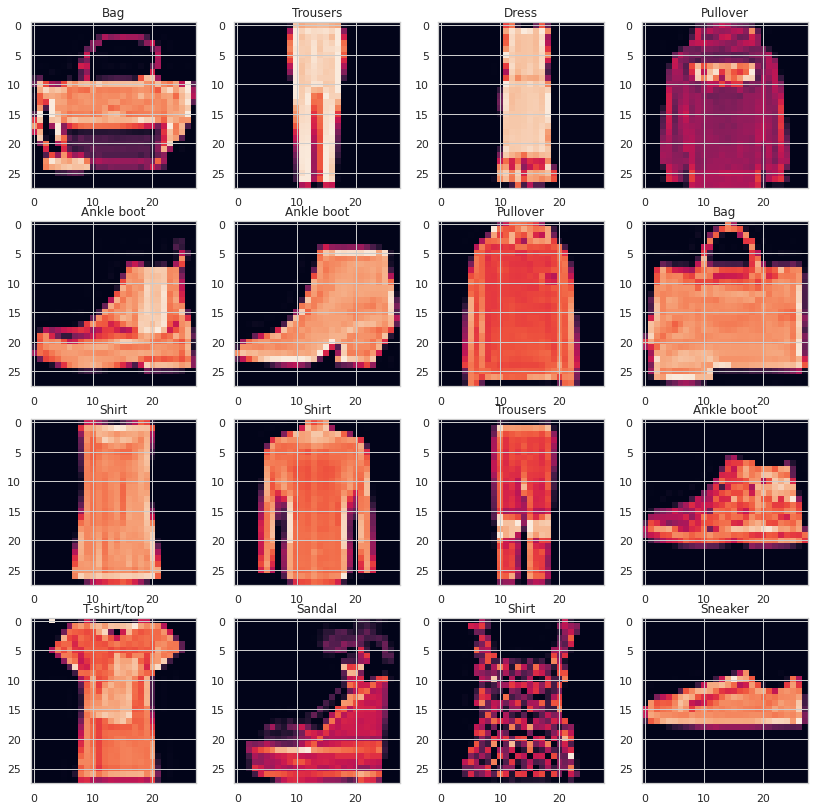

In [ ]:
# first 12 examples in the data

rows, cols = (4, 4)
fig, axs = plt.subplots(rows, cols, figsize=(14, 14))  # creating a 4 by 4 grid

for row in range(rows):
  for col in range(cols):

    idx = 4 * row + col  # the idx of image to plot
    img = normalized_df.loc[idx, 'pixel1':'pixel784']  # the image to plot
    
    """
    The dataframe stores each image as a 1-d array.
    But an image needs to be 2-d array to be plotted.

    Therefore, I will convert 1-d array to 2-d array,
    so that I can plot examples.
    """
    img_to_ndarray = img.to_numpy(dtype=np.float32)
    img_to_ndarray = np.reshape(img_to_ndarray, (28, 28))  # 784 => 28 * 28

    axs[row][col].imshow(img_to_ndarray)
    axs[row][col].set_title(normalized_df.loc[idx, 'label'])

    

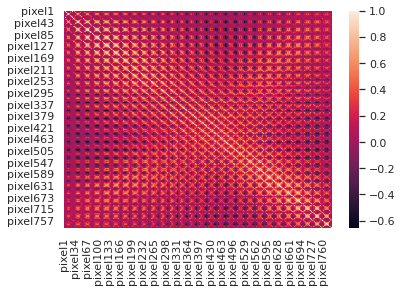

In [ ]:
# any correaltion between pixel values

sns.heatmap(normalized_df.corr())

There is a clear correlation pattern between pixel values. There tends be high correlation between nearby pixels. This is expected because there is a single object in the middle in each example.

In [ ]:
df.drop(['label'], axis=1).describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,2000.0,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.00000,2000.000000,2000.0000,2000.00000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.0,0.000500,0.016000,0.03400,0.132500,0.226000,0.515000,2.153500,4.94500,14.191500,33.143500,47.064000,53.248000,51.044000,50.962000,53.898000,52.730000,41.67900,27.101500,9.948000,3.57850,1.768000,1.0480,0.85900,0.414000,0.322500,0.078000,0.00200,0.002000,0.024000,0.10900,0.219000,0.658500,1.743500,7.029000,17.169000,29.992500,52.164500,79.654500,100.490500,...,92.295500,89.696500,76.271500,60.565500,45.364000,45.097000,49.347500,39.366500,23.47900,8.842,3.443000,0.399000,0.050000,0.313000,1.189500,4.422000,13.317500,21.11400,21.636500,16.281500,21.617500,29.865000,40.958500,51.449000,52.3640,46.162500,42.380500,44.453000,49.662500,45.394000,33.232000,22.682500,16.067000,17.81600,23.696500,18.694500,9.060500,2.390500,0.619500,0.076500
std,0.0,0.022361,0.183741,0.22775,3.584602,4.371096,5.564823,13.976681,21.61237,37.662542,57.708119,67.646943,70.444998,69.664723,68.678672,70.885958,69.856589,64.52597,53.141511,31.956532,19.17401,14.367999,11.0434,9.83252,6.626655,7.097371,2.528065,0.06323,0.054749,1.006941,4.13989,4.042055,8.889454,14.226029,29.331456,47.034344,63.289677,81.751606,95.155654,99.903555,...,100.980125,99.815855,94.075113,87.772939,78.066912,78.210076,83.452879,75.226436,57.48705,37.333,22.507644,5.878272,1.383639,6.312444,10.657457,21.772114,38.117111,49.20649,49.223682,41.392523,47.998564,55.844472,62.964538,70.014816,71.3306,68.196154,67.017568,67.245481,69.405887,66.713193,58.341795,48.890376,41.768994,44.33599,52.444853,46.832989,29.783391,15.563937,7.501657,1.870133
min,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.0000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

Since there are too many attributes in the data, it is quite hard to find insightful information by performing EDA.

However, some examples have similar shapes. For example, an Ankle Boot and an Sneaker look quite similar to each other. So I expect to see that some clusters will not be well seperated.

# t-SNE plots

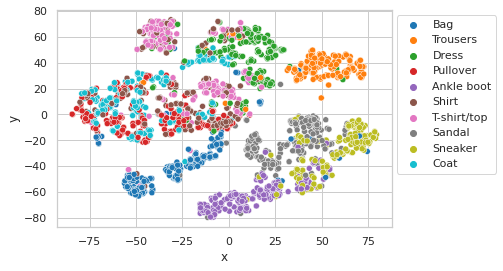

In [ ]:
# Project the dataset on a bidimensional plane
tsne = TSNE(n_components=2, perplexity=10, random_state=1000)
data_tsne = tsne.fit_transform(df.drop(['label'], axis=1))

df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=df.index)
dff = pd.concat([df, df_tsne], axis=1)

# Show the diagram
sns.scatterplot(x='x',y='y', hue='label', data=dff)

plt.legend(bbox_to_anchor=(1, 1))
plt.show()

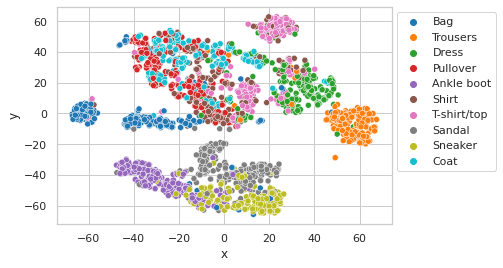

In [ ]:
# Project the dataset on a bidimensional plane
tsne = TSNE(n_components=2, perplexity=20, random_state=1000)
data_tsne = tsne.fit_transform(df.drop(['label'], axis=1))

df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=df.index)
dff = pd.concat([df, df_tsne], axis=1)

# Show the diagram
sns.scatterplot(x='x',y='y', hue='label', data=dff)

plt.legend(bbox_to_anchor=(1, 1))
plt.show()

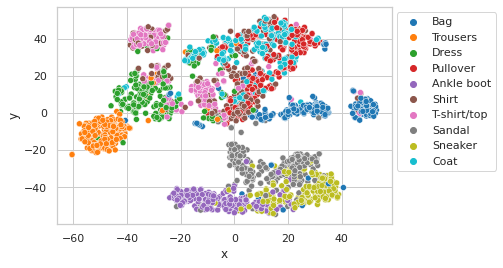

In [ ]:
# Project the dataset on a bidimensional plane
tsne = TSNE(n_components=2, perplexity=30, random_state=1000)
data_tsne = tsne.fit_transform(df.drop(['label'], axis=1))

df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=df.index)
dff = pd.concat([df, df_tsne], axis=1)

# Show the diagram
sns.scatterplot(x='x',y='y', hue='label', data=dff)

plt.legend(bbox_to_anchor=(1, 1))
plt.show()

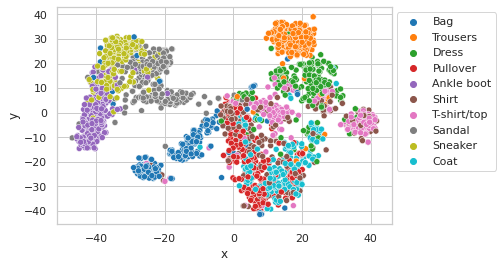

In [ ]:
# Project the dataset on a bidimensional plane
tsne = TSNE(n_components=2, perplexity=50, random_state=1000)
data_tsne = tsne.fit_transform(df.drop(['label'], axis=1))

df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=df.index)
dff = pd.concat([df, df_tsne], axis=1)

# Show the diagram
sns.scatterplot(x='x',y='y', hue='label', data=dff)

plt.legend(bbox_to_anchor=(1, 1))
plt.show()

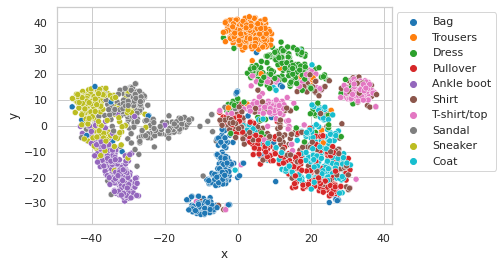

In [ ]:
# Project the dataset on a bidimensional plane
tsne = TSNE(n_components=2, perplexity=50, random_state=1000)
data_tsne = tsne.fit_transform(normalized_df.drop(['label'], axis=1))

df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=normalized_df.index)
dff = pd.concat([df, df_tsne], axis=1)

# Show the diagram
sns.scatterplot(x='x',y='y', hue='label', data=dff)

plt.legend(bbox_to_anchor=(1, 1))
plt.show()

# Pre-Analysis Questions


1. Is this data clusterable? Why?

* Yes this data set is clusterable. We built a variety of t-SNE plots to determine which perplexity provided us with the best clusertings. The best t-SNE plot that we got was with a perplexity of 50 and random_state of 100. With the perplexity of 10, 20, and 30 we see that were are solid clusters, however they were not as distinct. 
2. If so, describe the underlying clustering structure of the data. 
  
  a. How many underlying clusters does the data have? 
 * We were able to determine that the dataset had an underlying of 10 clusters when using a perplexity of 50.

  b. What are the shapes of the underlying clusters?
  * The shapes of these clusters was relatively spherical. Many of them did not take on the proper round shape and were more oval shaped.
 
  c. Are they balanced in size? 
  * The clusters are not balanced in size, we can see that some are more clumped together and smaller, whereas there are others that are more spread out containing more data points.

  d. Do any of the clusters overlap with each other? 
  * Yes, we can see that there are select clusters that overlap with each other. These are not easy to distinguish as they are spread out on top of one another.

* For the first algorithm method, we will be using k-means. K-means is used for finding groups that have not been explicitly labeled in the data. This will be helpful for us because by looking at our t-SNE plots, a lot of the clusterings have some overlap, and could be categorized in the incorrect cluster. Some assumptions when using k-means are whether or not the cluster sizes are balanced, if their shape is spherical, well-separated, with little noise and outliers. In order to confirm if we can use this dataset, we will check the cluster shapes, the number of objects in each cluster, and their clusterability. Looking at our t-SNE plots, we can see that our data satisfies the requirements for a k-means test and we can use it to determine if our data is clusterable.

* For our second algorithm method, we will be using NMF to cluster our dataset. Nonnegative Matrix Factorization is a great tool for analysis of high dimensional data. NMF is able to project the dataset of object and attributes onto a smaller set of dimensions. It can cluster them into similar sets as well based on similarities in their attribute vectors and object scores. NMF is able to use the relationship between the underlying clusters that we found in our dataset and the cluster membership score to impute missing attribute values for objects. By creating matrices of our data each row of W can represent the digit cluster membership scores for that digit. And each column of H can be used to represent the pixel cluster membership scores for a pixel. This will allow us to have a better gage into each individual pixel.

# Clustring Algorithms

# KMeans

In order to perform KMeans algorithm, the number of clusters must be given as an argument beforehand. Therefore, we decided to draw an elbow plot to find out what might be a good number to use.

In [ ]:
# creating a new DataFram without the label column

X = df.drop(['label'], axis=1).copy()
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,15,230,211,213,219,222,222,214,210,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,107,255,239,...,244,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,109,127,0,19,131,124,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,154,175,31,0,0,66,164,67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,212,...,204,192,203,164,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,42,174,46,116,53,54,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,36,43,71,95,122,108,78,68,61,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,27,131,88,117,...,111,106,107,154,56,111,135,148,44,0,0,0,0,0,0,0,0,0,0,19,113,101,107,105,108,112,111,109,108,108,109,136,35,0,14,15,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
clusters_nums = list(range(5, 13))  # the numbers of clusters that we are going to try to fit
silhouette_scores = []  # a list that will contain silhouette scores

for k in clusters_nums:

  kmeans = KMeans(n_clusters=k, random_state=1000).fit(X)
  labels = kmeans.labels_
  score = silhouette_score(X, labels)
  silhouette_scores.append(score)

<function matplotlib.pyplot.tight_layout>

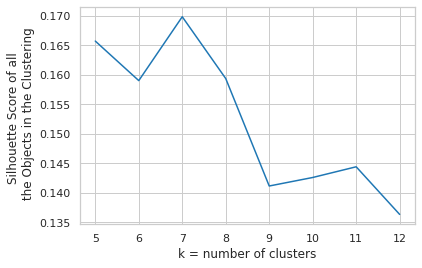

In [ ]:
plt.plot(clusters_nums, silhouette_scores)
plt.xlabel('k = number of clusters')
plt.ylabel('Silhouette Score of all \n the Objects in the Clustering')
plt.tight_layout

First, there is a clear decrease between 7 and 9. It might be a good indication of the true number of clusters is a number larger or equal to 9.

Also, 11 didn't produce the best Silhouette score even though the true number of clusters is 11. 9, 12 produced slightly better scores. So I will be using those three numbers 9, 10, and 12 to draw silhouette plots, and compare each result.

In [ ]:
"""
We will be using the given function from a past assignment
to create silhouette plots.
"""

def create_silhouette_plot(X, cluster_labels):
    #------------------------------------------------------
    #INPUT:
    #-----------------------------------------------------
    #X=dataframe of objects you clusterted
    #cluster_labels=cluster labels of each of the objects in the dataset X that you just clustered 

    #Gets the unique labels in the cluster_labels
    clabels=np.unique(cluster_labels)
    #Gets the number of unique labels
    k=len(clabels)
    
    #-------------------------------------------------------
    #SETTING UP THE PLOT SPACE
    # Create a subplot with 1 row and 1 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (k+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (k + 1) * 10])

    #FINDS THE SILHOUETTE SCORE FOR EACH OBJECT
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10

    
    for i in clabels:
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    plt.show()

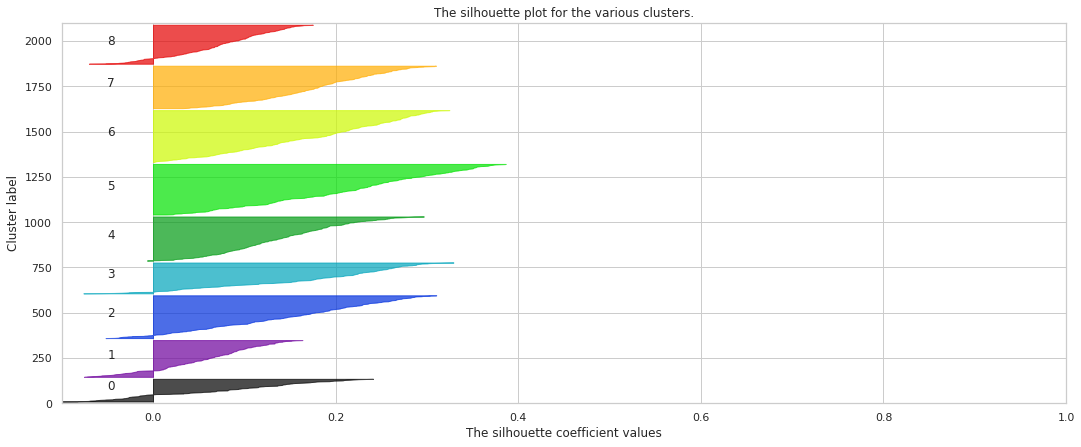

In [ ]:
  kmeans = KMeans(n_clusters=9, random_state=1000).fit(X)
  labels = kmeans.labels_

  create_silhouette_plot(X, labels)

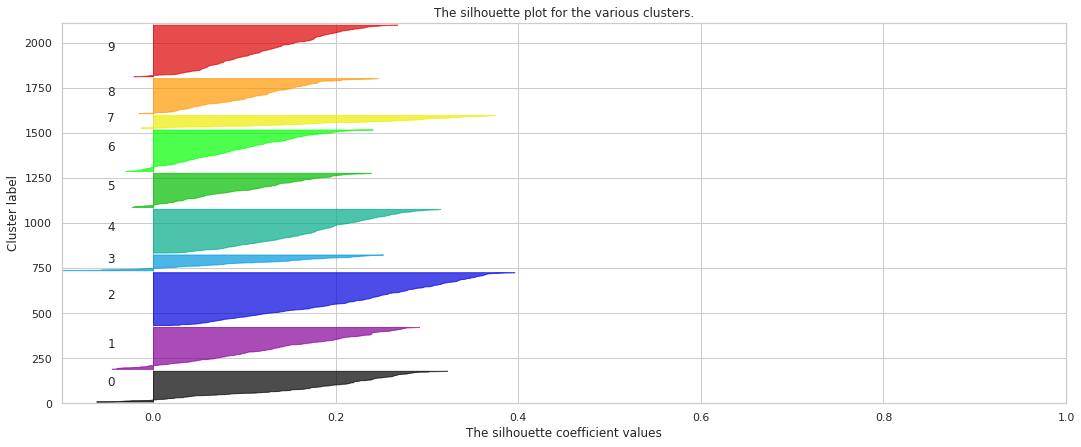

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=1000).fit(X)
labels = kmeans.labels_

create_silhouette_plot(X, labels)

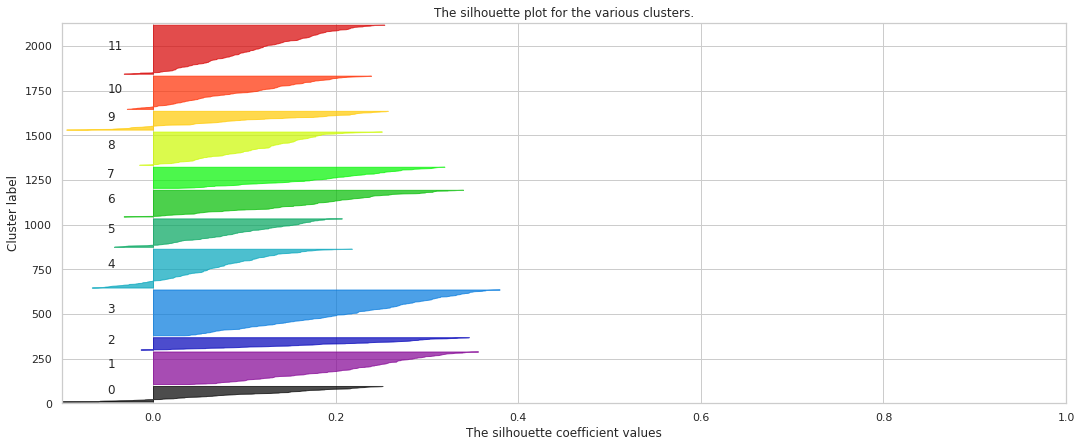

In [ ]:
kmeans = KMeans(n_clusters=12, random_state=1000).fit(X)
labels = kmeans.labels_

create_silhouette_plot(X, labels)

In most cases, the KMeans algorithm seem to did a decent job finding out underlying clusters. But in every number of k's, there are examples that have negative Silhouette score, indicating that some clusters are not cohesive.

Although the elbow plot suggested that 9 might be the best number of clusters, the Silhouette plot suggest that 10 might be the true number of clusters becuase there are the least number of object that have negative Silhouette coefficient values. Also, the examples in each cluster seem to be most cohesive compared to other k values due to their shapes.

The following are some other obesrvations.

* The cluster 0 tends to have the largest number of outliers due to its largest number of examples that have negative Silhouette scores when k = 9 and 12.
* The cluster 0 tends to have the largest number of outliers due to its largest number of examples that have negative Silhouette scores when k = 10.
* In case of k = 9, clusters that have less examples tend to have larger number of examples that have negative Silhouette score.
* In case of k = 10, cluster 3 has the lowest number of examples, but it has the larget number of examples that have negative Silhouette score.
* In case of k = 12, most clusters have less number of examples besides cluster 1, 3, and 11. Also many clusters have examples that have negative Silhouette score. This might an indication of 12 is slightly larger than the true number of clusters.

These results are somewhat expected becase most examples in each cluster quite overlap to each other.Therefore, the KMeans algorithm might have misclassified these examples.

It also might be a good idea to draw t-SNE plots again to see how clusters created by the KMeans algorithm might differ from the actual clusters.

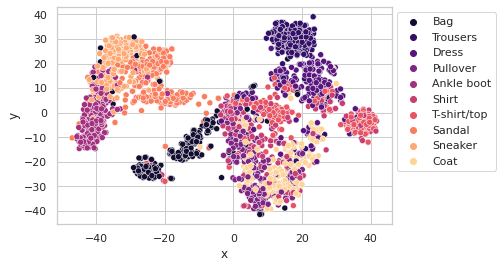

In [ ]:
# instantiating a TSNE object
tsne = TSNE(n_components=2, perplexity=50, random_state=1000)
data_tsne = tsne.fit_transform(X)

df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=X.index)
dff = pd.concat([df, df_tsne], axis=1)

# Show the t-SNE plot with the true labels
sns.scatterplot(x='x',y='y', hue='label', data=dff, palette='magma')
plt.legend(bbox_to_anchor=(1, 1))

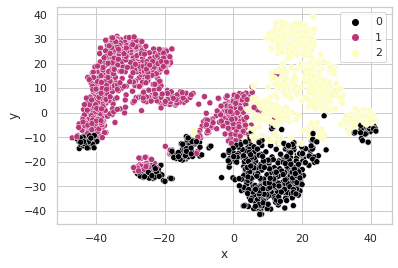

In [ ]:
# instantiating a KMeans object with k = 9
kmeans = KMeans(n_clusters=3, random_state=1000).fit(X)
labels = kmeans.labels_

# appending the predicted label to dff DataFrame
dff['predicted_cluster'] = labels

# Show the t-SNE plot with the predicted labels
sns.scatterplot(x='x',y='y', hue='predicted_cluster', data=dff, palette='magma')
plt.legend(bbox_to_anchor=(1, 1))

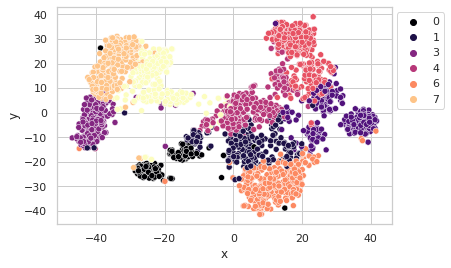

In [ ]:
# instantiating a KMeans object with k = 9
kmeans = KMeans(n_clusters=9, random_state=1000).fit(X)
labels = kmeans.labels_

# appending the predicted label to dff DataFrame
dff['predicted_cluster'] = labels

# Show the t-SNE plot with the predicted labels
sns.scatterplot(x='x',y='y', hue='predicted_cluster', data=dff, palette='magma')
plt.legend(bbox_to_anchor=(1, 1))

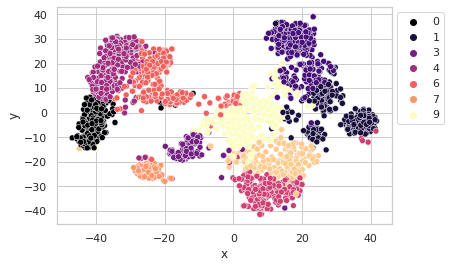

In [ ]:
# instantiating a KMeans object with k = 10
kmeans = KMeans(n_clusters=10, random_state=1000).fit(X)
labels = kmeans.labels_

# appending the predicted label to dff DataFrame
dff['predicted_cluster'] = labels

# Show the t-SNE plot with the predicted labels
sns.scatterplot(x='x',y='y', hue='predicted_cluster', data=dff, palette='magma')
plt.legend(bbox_to_anchor=(1, 1))

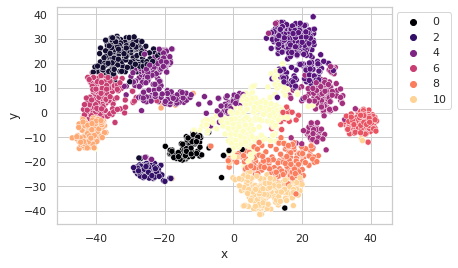

In [ ]:
# instantiating a KMeans object with k = 12
kmeans = KMeans(n_clusters=12, random_state=1000).fit(X)
labels = kmeans.labels_

# appending the predicted label to dff DataFrame
dff['predicted_cluster'] = labels

# Show the t-SNE plot with the predicted labels
sns.scatterplot(x='x',y='y', hue='predicted_cluster', data=dff, palette='magma')
plt.legend(bbox_to_anchor=(1, 1))

In [ ]:
# the KMeans instance that will be used to calculate the adjusted RAND score at the end

final_kmeans = KMeans(n_clusters=10, random_state=1000).fit(X)

# NMF

In case of the NMF algorithm, it takes 3 arguments, number of components, alpha, and l1_ratio.

* In order to find out the "good" numer of components, we will draw an elbow plot.

* Although there are 784 attributes in total, we weren't sure how many actual values, non-zero values, there are. So we decided to find out the number of actual values in each example.

In [ ]:
X.astype(bool).sum(axis=1)  # the number of non-zero values in each example

0       458
1       242
2       238
3       542
4       396
       ... 
1995    493
1996    381
1997    641
1998    451
1999    236
Length: 2000, dtype: int64

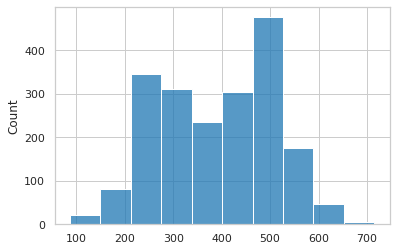

In [ ]:
sns.histplot(X.astype(bool).sum(axis=1), bins=10)

It is quite clear that only a few examples have more than 600 attributes. Most examples have 4 - 500 pixel values. So we decided to use 400 to be the maximum possible n_components value.

Also in case of regularization constants, we decided to use something large because the n_components value is large.

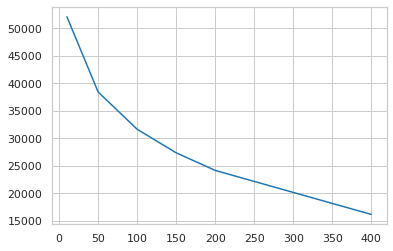

In [ ]:
import warnings
warnings.filterwarnings("ignore")

k_list=[]
recon_error_list=[]
for k in [10, 50, 100, 150, 200, 400]:
    trial_sublist=[]
    for trial in range(0,3):
        nmf = NMF(n_components=k, alpha=2.5, l1_ratio=.95)
        W=nmf.fit_transform(X)
        trial_sublist.append(nmf.reconstruction_err_)
    recon_error_list.append(np.average(trial_sublist))
    k_list.append(k)
    
plt.plot(k_list,recon_error_list)
plt.show()

In [ ]:
nmf = NMF(n_components=200, alpha=2.0, l1_ratio=0.3, random_state=1000)
W = nmf.fit_transform(df.drop(['label'], axis=1))
H = nmf.components_

In [ ]:
print(W.shape)
print(H.shape)

(2000, 200)
(200, 784)


The NMF algorithm produced the W matrix, than can be used to represent the label cluster membership scores for each example.

Since there are 2000 examples in the data, there are 2000 rows. Also, there are 200 columns that combine 784 attributes.

In [ ]:
W[:5, :5]  # first five attributes of first five examples

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.82490052,  0.45014459,  0.        ,  0.        ,  3.44057247],
       [ 0.        , 10.25962102,  0.        ,  3.67513594,  0.        ]])

In order to find out the cluster membership score, the W matrix has to be divided by its sum.

In [ ]:
cm_scores = W / np.sum(W, axis=1, keepdims=1)
cm_scores[:5, :5]  # first five attributes of first five examples

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.00804565, 0.00439048, 0.        , 0.        , 0.03355755],
       [0.        , 0.08539727, 0.        , 0.03059046, 0.        ]])

In [ ]:
print(np.argmax(cm_scores[0]))
print(cm_scores[0, 13])

13
0.04758271899809386


So the W matrix tells us that the first example belongs to 13 with 4.76%.

It also produced the H matrix, that can be used to represent the pixel cluster membership scores for a pixel.

In [ ]:
cm_scores_H = H / np.sum(H, axis=0, keepdims=True)

In [ ]:
cm_scores_H[:, 0]  # an issue caused by diving a number by 0; 0 / 0

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [ ]:
H[:, 100]

array([1.00233585e+01, 0.00000000e+00, 2.32766485e+00, 2.75301847e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.33563160e+01, 0.00000000e+00, 0.00000000e+00,
       1.29388982e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.32243240e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.12608267e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.35648021e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.81081589e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.92031453e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

By looking at the H matrix, we can noitce that the first attribute that combined 784 index doesn't belong to any clusters. It is probably because the first few pixels in the data are most likely to be 0.

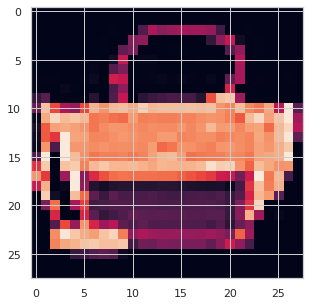

In [ ]:
"""
Since each example can be represented as W * H,
each example is a linear combination of W matrix and H matrix.

It, however, isn't clear to see this relationship by looking at
bunch of numbers.

So we will plot the first example first and some values in W * H.
"""

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

img = normalized_df.loc[0, 'pixel1':'pixel784']  # the image to plot
img_to_ndarray = img.to_numpy(dtype=np.float32)
img_to_ndarray = np.reshape(img_to_ndarray, (28, 28))

ax.imshow(img_to_ndarray)

In [ ]:
np.round(W[0], 2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.17, 0.28, 5.67, 0.  , 0.  , 0.69, 0.07, 0.  , 0.  , 0.9 , 0.52,
       5.09, 0.  , 0.29, 0.  , 0.12, 0.  , 1.15, 0.37, 0.  , 0.68, 2.86,
       0.87, 0.  , 0.58, 0.  , 0.16, 0.  , 0.93, 0.  , 0.03, 0.  , 4.13,
       0.44, 1.07, 0.  , 0.  , 0.  , 0.24, 0.  , 1.49, 0.08, 0.  , 0.57,
       0.73, 0.08, 0.  , 0.  , 0.  , 0.  , 0.  , 2.45, 0.47, 0.18, 0.  ,
       0.62, 0.  , 0.  , 0.84, 4.27, 0.  , 0.  , 0.  , 0.  , 0.01, 0.  ,
       1.07, 0.  , 0.41, 0.46, 0.  , 0.93, 0.29, 0.71, 0.08, 0.22, 0.  ,
       0.81, 0.37, 0.8 , 1.29, 0.01, 0.08, 0.  , 0.  , 0.  , 1.17, 0.45,
       0.27, 0.  , 0.  , 2.04, 1.87, 0.  , 0.  , 1.4 , 0.  , 1.27, 0.  ,
       0.  , 0.07, 0.  , 0.67, 0.38, 0.  , 0.  , 0.  , 2.36, 0.  , 0.  ,
       0.  , 0.37, 0.85, 0.  , 3.36, 0.66, 3.66, 0.  , 0.16, 0.  , 1.65,
       2.5 , 0.  , 2.55, 0.21, 0.  , 1.06, 0.93, 0.73, 3.42, 4.6 , 0.57,
       0.  , 0.  , 0.  , 1.11, 1.21, 0.  , 0.4 , 0.

In [ ]:
indicies = np.argpartition(W[0], -5)[-5:]  # index of first five largest values
indicies = list(indicies[::-1])
indicies

[22, 168, 13, 141, 70]

In [ ]:
for idx in indicies:
  print(W[0, idx])

5.0879834089046625
4.604409647311038
5.669038336104982
4.599673808520019
4.2722290675375305


So this tells us that the first example is most characterized by those index values.

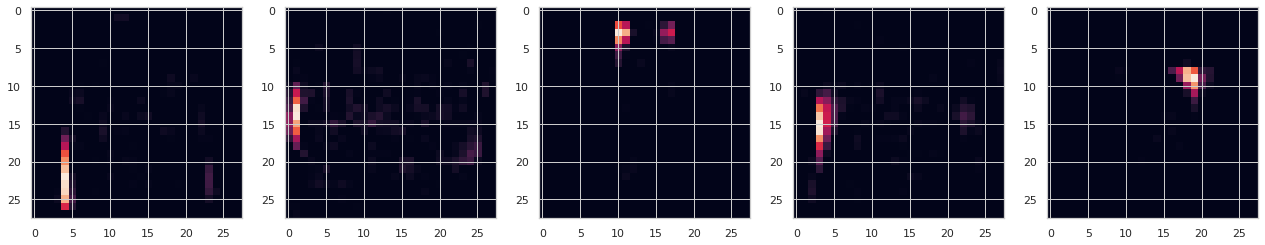

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(22, 15))

for i in range(0, 5):
  plot_id = indicies[i]
  ax[i].imshow(H[plot_id - 1].reshape(28, 28))

* Image cluster 22 is characterized by pixels that have a piece like that shown in the H22 image above.
* Image cluster 168 is characterized by pixels that have a piece like that shown in the H168 image above.
* Image cluster 13 is characterized by pixels that have a piece like that shown in the H13 image above.
* Image cluster 141 is characterized by pixels that have a piece like that shown in the H141 image above.
* Image cluster 70 is characterized by pixels that have a piece like that shown in the H70 mage above.


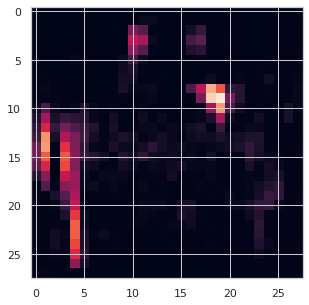

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

img = H[21] + H[167] + H[12] + H[140] + H[69] # the image to plot

ax.imshow(img.reshape(28, 28))

Here, we were able to combine the image clusters that we found to produce a pixelated image of the index values. As we can see, they begin to form the shape of the bag. 

In [ ]:
df_with_W = pd.DataFrame(cm_scores, columns=['image_cluster_%s'%str(i+1) for i in range(0, 200)])
df_with_W['actual_label'] = df['label']
df_with_W.head()

,image_cluster_1,image_cluster_2,image_cluster_3,image_cluster_4,image_cluster_5,image_cluster_6,image_cluster_7,image_cluster_8,image_cluster_9,image_cluster_10,image_cluster_11,image_cluster_12,image_cluster_13,image_cluster_14,image_cluster_15,image_cluster_16,image_cluster_17,image_cluster_18,image_cluster_19,image_cluster_20,image_cluster_21,image_cluster_22,image_cluster_23,image_cluster_24,image_cluster_25,image_cluster_26,image_cluster_27,image_cluster_28,image_cluster_29,image_cluster_30,image_cluster_31,image_cluster_32,image_cluster_33,image_cluster_34,image_cluster_35,image_cluster_36,image_cluster_37,image_cluster_38,image_cluster_39,image_cluster_40,...,image_cluster_162,image_cluster_163,image_cluster_164,image_cluster_165,image_cluster_166,image_cluster_167,image_cluster_168,image_cluster_169,image_cluster_170,image_cluster_171,image_cluster_172,image_cluster_173,image_cluster_174,image_cluster_175,image_cluster_176,image_cluster_177,image_cluster_178,image_cluster_179,image_cluster_180,image_cluster_181,image_cluster_182,image_cluster_183,image_cluster_184,image_cluster_185,image_cluster_186,image_cluster_187,image_cluster_188,image_cluster_189,image_cluster_190,image_cluster_191,image_cluster_192,image_cluster_193,image_cluster_194,image_cluster_195,image_cluster_196,image_cluster_197,image_cluster_198,image_cluster_199,image_cluster_200,actual_label
0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001462,0.002344,0.047583,0.000000,0.000000,0.005761,0.000548,0.000000,0.000000,0.007528,0.004363,0.042706,0.000000,0.002438,0.000000,0.000987,0.000000,0.009675,0.003133,0.000000,0.005713,0.023993,0.007277,0.0,0.004846,0.0,0.001371,0.000000,0.007805,...,0.011917,0.000000,0.011125,0.000000,0.010422,0.003227,0.034476,0.038647,0.0000,0.008093,0.000000,0.002086,0.004513,0.007608,0.001431,0.004695,0.000000,0.000000,0.006670,0.008796,0.000000,0.035588,0.000000,0.0,0.001683,0.002707,0.008217,0.000000,0.002033,0.004998,0.005086,0.000000,0.000106,0.007868,0.008451,0.000000,0.0,0.000000,0.004270,Bag
1,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000638,0.080133,0.000000,0.000000,0.000000,0.038195,0.032328,0.007217,0.000000,0.000000,0.000000,0.000000,0.047586,0.018849,0.000000,0.000000,0.000000,0.073609,0.007949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.006687,0.000000,0.000000,0.000000,0.007427,0.000000,0.000000,0.000000,0.0000,0.000000,0.048503,0.000082,0.011980,0.000000,0.000344,0.000000,0.000000,0.000000,0.000481,0.000000,0.015769,0.000000,0.000000,0.0,0.011814,0.022939,0.000000,0.000000,0.002164,0.000082,0.000000,0.000058,0.000000,0.000007,0.000000,0.014656,0.0,0.001242,0.000000,Trousers
2,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.018964,0.000000,0.011222,0.000000,0.000500,0.058846,0.056652,0.000000,0.000000,0.000000,0.000000,0.029698,0.023802,0.000000,0.000000,0.000000,0.035550,0.014227,0.000000,0.000000,0.000000,0.001570,0.000000,0.000000,0.060002,0.004077,0.0,0.000000,0.0,0.000000,0.001163,0.000000,...,0.008513,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.027555,0.000000,0.010761,0.000000,0.000000,0.000000,0.003733,0.000000,0.004983,0.000000,0.018385,0.000000,0.005055,0.0,0.016973,0.029646,0.000000,0.000670,0.001766,0.001247,0.000000,0.000000,0.000000,0.000000,0.000000,0.026746,0.0,0.000000,0.000000,Dress
3,0.008046,0.004390,0.0,0.00000,0.033558,0.000118,0.028967,0.019489,0.006014,0.007888,0.000000,0.016496,0.019984,0.001958,0.007769,0.000084,0.004118,0.001456,0.000000,0.021491,0.002612,0.020339,0.021103,0.008160,0.009267,0.004035,0.000404,0.009165,0.001341,0.010563,0.008926,0.009371,0.000000,0.001660,0.0,0.000112,0.0,0.006409,0.022106,0.000000,...,0.002447,0.006007,0.001584,0.000000,0.008285,0.000835,0.000000,0.000000,0.0000,0.006025,0.003790,0.002544,0.006595,0.005385,0.000000,0.000888,0.000000,0.010231,0.000703,0.00

Finally, let's look at the distribution of these cluster membership weights for the bag and compare them to the cluster membership weights for all the pixels.


In [ ]:
df_bag = df_with_W[df_with_W['actual_label'] == 'Bag']
df_not_bag = df_with_W[df_with_W['actual_label'] != 'Bag']

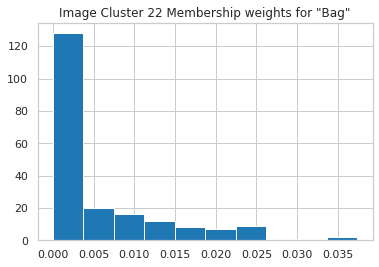

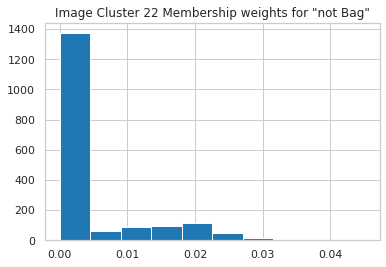

In [ ]:
df_bag['image_cluster_22'].hist()
plt.title('Image Cluster 22 Membership weights for "Bag"')
plt.show()

df_not_bag['image_cluster_22'].hist()
plt.title('Image Cluster 22 Membership weights for "not Bag"')
plt.show()

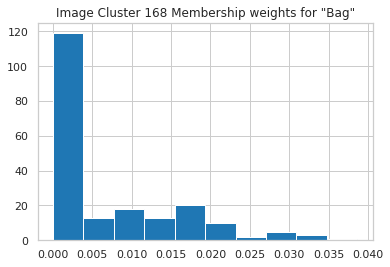

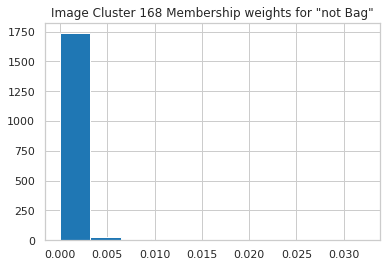

In [ ]:
df_bag['image_cluster_168'].hist()
plt.title('Image Cluster 168 Membership weights for "Bag"')
plt.show()

df_not_bag['image_cluster_168'].hist()
plt.title('Image Cluster 168 Membership weights for "not Bag"')
plt.show()

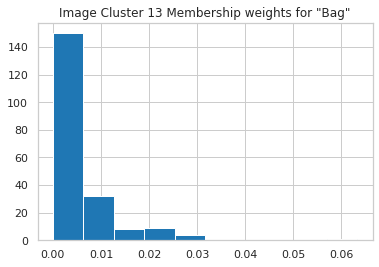

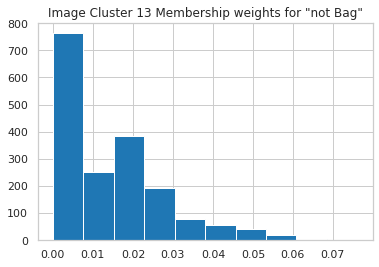

In [ ]:
df_bag['image_cluster_13'].hist()
plt.title('Image Cluster 13 Membership weights for "Bag"')
plt.show()

df_not_bag['image_cluster_13'].hist()
plt.title('Image Cluster 13 Membership weights for "not Bag"')
plt.show()

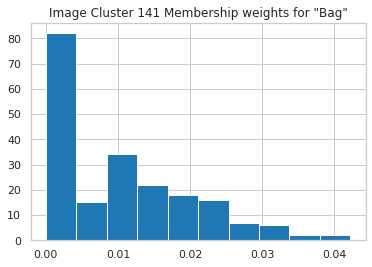

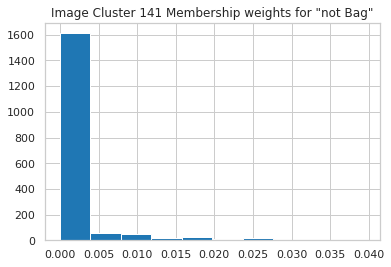

In [ ]:
df_bag['image_cluster_141'].hist()
plt.title('Image Cluster 141 Membership weights for "Bag"')
plt.show()

df_not_bag['image_cluster_141'].hist()
plt.title('Image Cluster 141 Membership weights for "not Bag"')
plt.show()

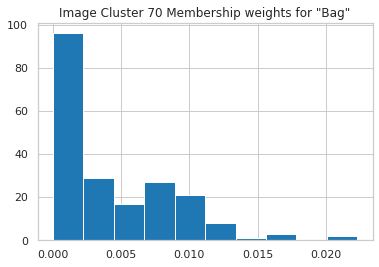

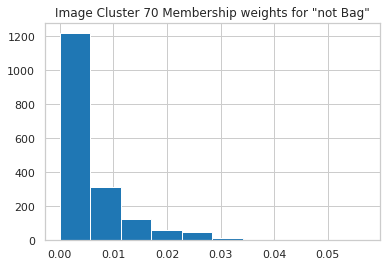

In [ ]:
df_bag['image_cluster_70'].hist()
plt.title('Image Cluster 70 Membership weights for "Bag"')
plt.show()

df_not_bag['image_cluster_70'].hist()
plt.title('Image Cluster 70 Membership weights for "not Bag"')
plt.show()

Image that represents a bag  is more likely to have higher cluster membership weights for image clusters 22,168,13,141 and 70.


# Post-Analysis

1. Separation and Cohesion: Are there are any objects that have poor cohesion with their assigned cluster?

  a. K-Means: Looking at the k-means clustering plot with ten clusters,  we can see that majority of the clusters hold strong cohesion. If we take a closer look we can see that clusters 1, 2, and 3 are the ones thats stand out and have less cohesive data points then the rest of the clusters. As for separation, clusters such as 0 and 7 are separated from the main cluster. 0 however, is separated with other clusters. 

  b. NMF: For NMF we can see that from the indices that we found, when overlaid, they are quite separated and two of them have strong cohesion with one another, whereas the rest of them are separated. 


2. Cluster Attributes: What attributes (and attribute relationships) standout for objects assigned to this dataset?

  To determine which attributes stand out for objects assigned to this dataset, we looked at the NMF clustering and the indices that we found.  The reason we did this is because in the NMF clustering, we looked at matrix W and used that to find the largest 5 values that correspond to a cluster label. From that, we were able  to see that the attributes that stand out the most are associated with clusters 22, 168, 13, 141, and 70. 


3. Supervised Learning Evaluation (if data had preassinged class labels): 

  i. Calculate the following: 

    1. Adjusted RAND Index between the clustering and the class labels.
    Both K-means and NMF resulted in an adjusted RAND score that is closer to zero.This indicates that the clustering that we found is not a great match with the pre-assigned class labels, however there is some overlap. 

    2. Homogeneity score between the clustering and the class labels.
    The homogeneity of K-means is higher than that of the NMF clustering, which means that the clusterings in k-means portray the closeness better than NMF. 

    3. Completeness score between the clustering and the class labels.
    The completeness score resulting from k-means is greater than the one from NMF which indicates that the assignments of samples belonging to the same class is stronger than that of NMF. 

  ii.  Color code the points in your t-sne plot by cluster labels and code the “style” of the marker with your class labels. Then interpret this plot. Did what you observe in this plot corroborate what you calculated in your adjusted rand index, the homogeneity score, and the completeness score?

In [ ]:
"""
Since the NMF algorithm is a clustering algorithm,
we made a hard partiion column to answer the first question.
"""
cm_scores_df = pd.DataFrame(cm_scores)  # creating a DataFrame that has cm_score values
cm_scores_df['hard_partition'] = np.argmax(cm_scores, axis=1)  # creating a hard partition column
cm_scores_df['hard_partition']

0       13
1        8
2       32
3       57
4        1
        ..
1995    53
1996     7
1997    18
1998     4
1999     8
Name: hard_partition, Length: 2000, dtype: int64

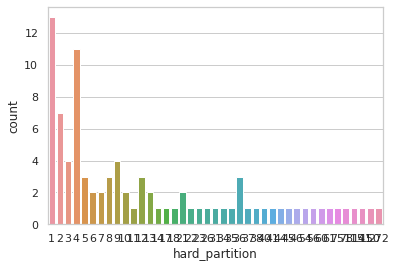

In [ ]:
sns.countplot(cm_scores_df.hard_partition.value_counts())

In order to answer the second question, we decided to draw a t-SNE plot for centroids created by KMeans. By doing so, we reduce 784 attributes to 2 columns so that we can plot them on a graph.

There is no simple way to find out which attributes characterize which clusters the most because there are too many attributes. But the t-SNE plot of centroids will be a good indication which clusters share the same attributes.

In [ ]:
centroids_df = pd.DataFrame(final_kmeans.cluster_centers_)
centroids_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,-3.252607e-19,-1.040834e-17,1.179612e-16,-2.220446e-16,3.330669e-16,-4.440892e-16,-3.996803e-15,-1.598721e-14,4.678363e-02,3.508772e-02,1.929825e-01,1.356725e+00,2.555556e+00,3.520468e+00,5.538012e+00,5.555556e+00,5.508772e+00,6.011696e+00,5.614035e+00,5.380117e+00,5.385965e+00,5.555556e+00,5.175439e+00,2.719298e+00,2.584795e+00,2.690058e-01,2.339181e-02,-1.301043e-18,-1.734723e-17,-2.498002e-16,-5.828671e-16,-5.551115e-16,-1.776357e-15,2.664535e-15,1.065814e-14,5.847953e-03,1.169591e-01,1.578947e-01,1.321637e+00,...,6.929825e+00,4.614035e+00,3.152047e+00,7.321637e+00,1.069591e+01,1.591228e+01,2.584795e+01,2.889474e+01,3.112281e+01,2.664327e+01,1.186550e+01,9.239766e-01,1.169591e-02,5.847953e-02,2.046784e-01,3.040936e-01,9.590643e-01,1.994152e+00,3.356725e+00,6.660819e+00,9.625731e+00,1.277193e+01,1.391813e+01,1.427485e+01,1.310526e+01,9.345029e+00,4.274854e+00,1.403509e+00,8.596491e-01,7.660819e-01,5.789474e-01,1.555556e+00,2.380117e+00,5.309942e+00,9.327485e+00,9.076023e+00,8.520468e+00,5.754386e+00,1.883041e+00,2.397661e-01
1,0.0,-3.252607e-19,7.296137e-02,1.072961e-01,9.442060e-02,2.532189e-01,2.103004e-01,5.223176e+00,1.412017e+01,3.467811e+01,6.328755e+01,7.032618e+01,7.257940e+01,6.358798e+01,6.163519e+01,6.760086e+01,7.600858e+01,6.731330e+01,4.798712e+01,2.245494e+01,8.137339e+00,2.064378e+00,3.090129e-01,1.845494e-01,3.862661e-02,1.287554e-02,2.775558e-16,-1.301043e-18,-1.301043e-18,-1.734723e-17,3.862661e-02,1.030043e-01,1.502146e-01,1.248927e+00,1.481974e+01,4.947210e+01,9.383691e+01,1.385579e+02,1.573691e+02,1.784206e+02,...,2.171588e+02,2.117897e+02,2.021631e+02,1.825236e+02,1.389871e+02,7.433476e+01,1.845923e+01,5.545064e+00,1.206009e+00,2.575107e-02,9.769963e-15,-7.771561e-16,-1.249001e-16,-1.110223e-15,-4.218847e-15,3.862661e-02,1.630901e-01,1.042918e+00,8.300429e+00,3.530043e+01,7.603004e+01,9.715451e+01,1.131030e+02,1.219185e+02,1.298326e+02,1.343004e+02,1.372575e+02,1.335837e+02,1.263262e+02,1.171631e+02,1.034034e+02,8.640343e+01,5.817167e+01,2.652361e+01,5.055794e+00,1.712446e+00,2.103004e-01,2.575107e-02,1.110223e-16,3.330669e-16
2,0.0,-3.252607e-19,-1.040834e-17,-2.775558e-17,8.503401e-02,8.163265e-02,9.183673e-02,1.326531e-01,1.622449e+00,2.052721e+01,8.205442e+01,1.148605e+02,1.073197e+02,9.750340e+01,9.062925e+01,9.811565e+01,1.042585e+02,1.047857e+02,7.733673e+01,1.556463e+01,1.302721e+00,9.523810e-02,8.843537e-02,8.503401e-02,-1.276756e-15,-1.221245e-15,3.469447e-16,-1.301043e-18,-1.301043e-18,-1.734723e-17,-8.743006e-16,-8.049117e-16,8.843537e-02,8.843537e-02,8.163265e-02,8.095238e-01,1.023810e+01,6.249660e+01,1.589830e+02,1.925612e+02,...,1.898673e+02,1.829014e+02,1.113741e+02,4.498980e+01,1.466327e+01,3.547619e+00,7.040816e-01,2.040816e-02,-6.394885e-14,-5.506706e-14,1.110223e-14,-7.771561e-16,-2.498002e-16,-1.387779e-15,-5.329071e-15,-2.042810e-14,6.802721e-03,6.802721e-03,1.020408e-02,7.823129e-01,5.540816e+00,2.097959e+01,6.495578e+01,1.181122e+02,1.190510e+02,7.059864e+01,4.741837e+01,7.314286e+01,1.182619e+02,1.123639e+02,5.723810e+01,1.619728e+01,3.445578e+00,2.517007e-01,1.020408e-02,6.802721e-03,-3.730349e-14,1.465494e-14,2.664535e-15,4.024558e-16
3,0.0,-3.252607e-19,-1.040834e-17,4.857226e-17,1.136364e-02,4.545455e-02,1.477273e+00,3.522727e-01,6.022727e-01,2.193182e+00,2.511364e+00,6.909091e+00,2.185227e+01,4.645455e+01,5.997727e+01,5.135227e+01,2.572727e+01,8.454545e+00,2.454545e+00,9.318182e-01,3.181818e-01,1.136364e-01,9.090909e-02,9.204545e-01,4.204545e-01,2.272727e-02,-8.326673e-17,-1.301043e-18,4.545455e-02,-1.734723e-17,2.272727e-02,1.318182e+00,3.250000e+00,4.170455e+00,4.943182e+00,2.193182e+00,2.500000e+00,4.750000e+00,1.402273e+01,3.637500e+01,...,1.304886e+02,1.303636e+02,1.292614e+02,1.267727e+02,1.

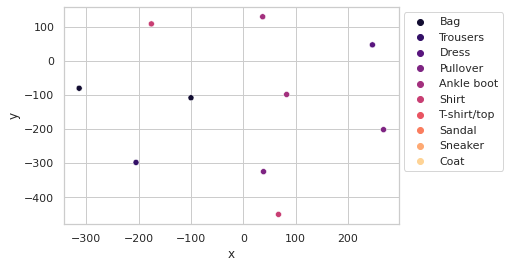

In [ ]:
tsne = TSNE(n_components=2, perplexity=50, random_state=1000)
data_tsne = tsne.fit_transform(centroids_df)

df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=centroids_df.index)
dff_centroids = pd.concat([df, df_tsne], axis=1)

sns.scatterplot(x='x',y='y', hue='label', data=dff_centroids,palette='magma')
plt.legend(bbox_to_anchor=(1, 1))

In [ ]:
KMeans_label = final_kmeans.labels_ 

In [ ]:
print("The Adjusted RAND score of KMeans algorithm = ",adjusted_rand_score(df.label, KMeans_label))
print("The Adjusted RAND score of NMF algorithm = ", adjusted_rand_score(df.label, cm_scores_df.hard_partition))

The Adjusted RAND score of KMeans algorithm =  0.3771305380254411
The Adjusted RAND score of NMF algorithm =  0.10251851496717103


In [ ]:
print("The homogeneity score of KMeans algorithm = ", homogeneity_score(df.label, KMeans_label))
print("The homogeneity score of NMF algorithm = ", homogeneity_score(df.label, cm_scores_df.hard_partition))

The homogeneity score of KMeans algorithm =  0.5228918081153653
The homogeneity score of NMF algorithm =  0.45010710353902683


In [ ]:
print("The completeness score of KMeans algorithm = ", completeness_score(df.label, KMeans_label))
print("The completeness score of NMF algorithm = ", completeness_score(df.label, cm_scores_df.hard_partition))

The completeness score of KMeans algorithm =  0.5395379422845236
The completeness score of NMF algorithm =  0.2856814106730534


In [ ]:
nmf = NMF(n_components=10, alpha=2.0, l1_ratio=0.3, random_state=1000)
W = nmf.fit_transform(df.drop(['label'], axis=1))
H = nmf.components_

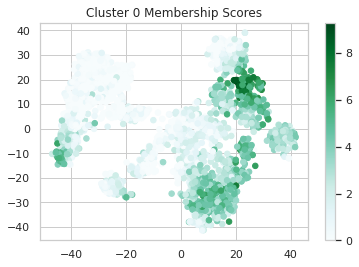

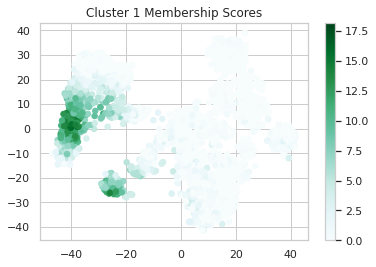

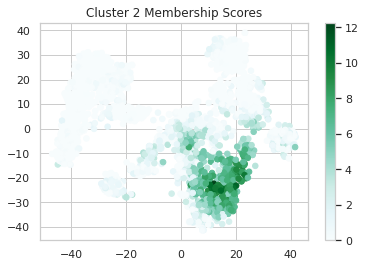

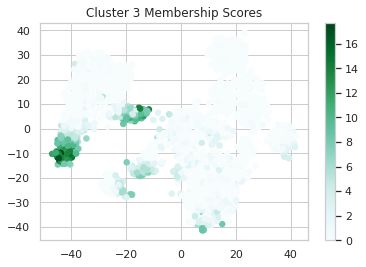

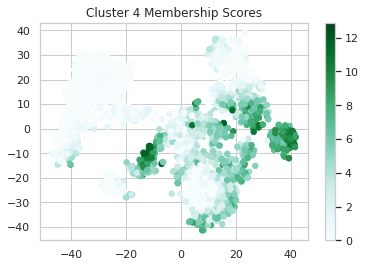

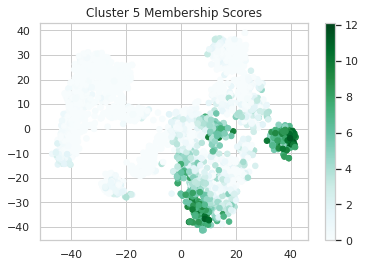

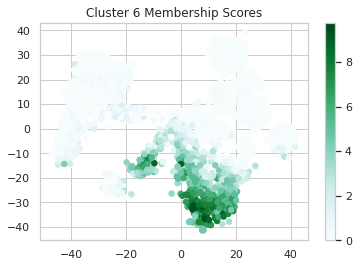

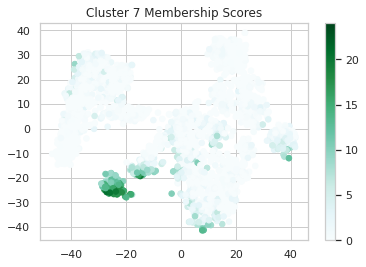

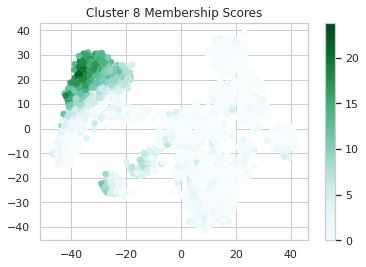

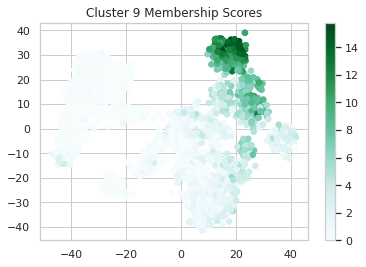

--------------------------------


In [ ]:
tsne = TSNE(n_components=2, perplexity=50, random_state=1000)
data_tsne = tsne.fit_transform(X)

df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=X.index)
dff = pd.concat([df, df_tsne], axis=1)

for i in range(0,10):
    #Create a column with cluster i membership scores
    dff['Cluster %s Membership Score'%str(i)]=W[:,i]

    #Plot the points, color coded by the membership score.
    points = plt.scatter(dff["x"], dff["y"],
                 c=dff['Cluster %s Membership Score'%str(i)], s=30, cmap="BuGn")
    plt.colorbar(points)
    plt.title('Cluster %s Membership Scores'%(i))
    plt.show()
print('--------------------------------')